# Question 4-B

> Part 'B-1': *Birthday Problem*


In [14]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#generating random birthday

def genRandomBirthday(days=365):
  birthday = random.randint(1,days) #random day in 365 days in a year
  return birthday

In [ ]:

#k is the amount of people
 
def genBirthdays(k):
    birthdays = [genRandomBirthday() for _ in range(k)]
    return birthdays

In [ ]:
#checking birthday similarity
def uniqueBirthday(birthdays):
    unique_birthdays = set(birthdays)
 
    num_birthdays = len(birthdays)
    num_unique_birthdays = len(unique_birthdays)
    has_coincidence = (num_birthdays != num_unique_birthdays)
 
    return has_coincidence

In [ ]:
def estimateUnique(k):
    num_aloc = 0
    for _ in range(10000):
        birthdays = genBirthdays(k)
        has_coincidence = uniqueBirthday(birthdays)
        if has_coincidence:
            num_aloc += 1
 
    p_aloc = num_aloc / 10000
    return p_aloc

In [ ]:
def estimate_p_aloc_for_range(ks):
    k_probabilities = []
 
    for k in ks:
        p_aloc = estimateUnique(k)
        k_probabilities.append(p_aloc)
         
    return k_probabilities

In [13]:
ks = range(2, 100 )
k_probabilities = estimate_p_aloc_for_range(ks)
 

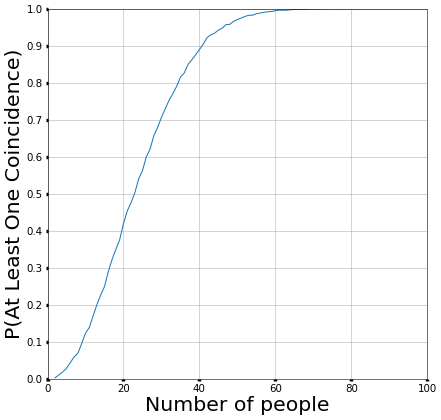

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=49)

ax.xaxis.set_tick_params(width=5)
ax.yaxis.set_tick_params(width=5)
 
sns.lineplot(x=ks, y=k_probabilities)
 
plt.xticks(fontsize=15)
y_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.yticks(y_range, fontsize=15)
plt.grid()
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.xlabel('Number of people', fontsize=30)
plt.ylabel('P(At Least One Coincidence)', fontsize=30)
 
plt.show()

> Part 'B-2': *Central Limit Theorem*

In [ ]:
import numpy as np
import pandas as pd



```
Normal Distribution:
```


In [ ]:
rate = 2
#Population mean
mu = 1/rate
# Population standard deviation
sd = np.sqrt(1/(rate**2))
print('Population mean:', mu)
print('Population standard deviation:', sd)

Population mean: 0.5
Population standard deviation: 0.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.5013173621695232, 0.022360679774997897)


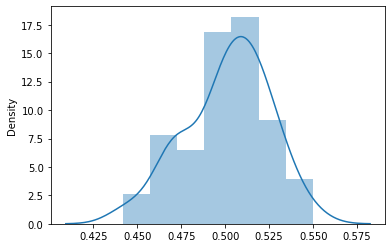

In [ ]:
def expSampling (sample_size, sample_iter):
  df = pd.DataFrame()

  for i in range(1, sample_iter+1):
    exp_sample = np.random.exponential((1/rate), sample_size)
    col = f'sample {i}'
    df[col] = exp_sample


  df_sample_means = pd.DataFrame(df.mean(),columns=['Sample means'])
  sns.distplot(df_sample_means);
  mean = np.mean(df_sample_means).values[0] # An estimate of the mean of the sampling distribution can be obtained as:
  clt = sd/ np.sqrt(sample_size)
  return mean, clt
# sampling(2, 50)
print(expSampling(500 ,50))



```
Binomial:
```



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(16.003020000000003, 0.05376156354018826)


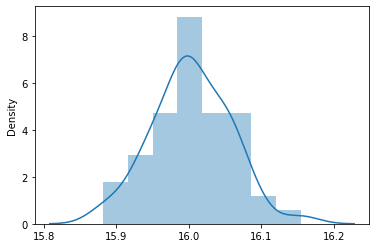

In [ ]:
def binSampling(sample_size, sample_iter):
  df = pd.DataFrame()

  for i in range(1, sample_iter+1):
    exponential_sample = np.random.binomial(20,0.8, sample_size)
    col = f'sample {i}'
    df[col] = exponential_sample

# Plotting the sampling distribution from a 
  df_sample_means_binomial = pd.DataFrame(df.mean(),columns=['Sample means'])
  sns.distplot(df_sample_means_binomial)
  sample_mean = df_sample_means_binomial.mean().values[0]
  sample_std = df_sample_means_binomial.std().values[0]
  return sample_mean, sample_std

print(binSampling(1000, 50))